In [2]:
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
def r2_calc(x,y):
    sum_1=0
    sum_2=0
    ave = np.sum(x)/len(x)
    for i in range(0,len(x)):
        sum_1 += (x[i]-y[i])**2
        sum_2 += (x[i]-ave)**2
    
    return 1-sum_1/sum_2


def r_calc(test,pred):
    n=len(test)
    ave_test = np.sum(test)/n
    ave_pred = np.sum(pred)/n
    a=0
    b=0
    c=0
    for i in range(0,len(test)):
        a += (test[i] - ave_test)*(pred[i] - ave_pred)
        b += (test[i] - ave_test)**2
        c += (pred[i] - ave_pred)**2
    
    a2 = a/n
    b2 = (b/n)**0.5
    c2 = (c/n)**0.5
    return a2/(b2*c2)

In [ ]:
def r_prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    
    path = 'Folder/残基毎_r.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("FURUKAWA_残基毎_rank.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]

        scaler = StandardScaler()
        scaler.fit(feature)
        feature = scaler.transform(feature)

        kf = KFold(n_splits = 5, shuffle = True)
        count = 0
        for train_index, test_index in kf.split(feature):
            train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]

            grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
            grid.fit(train_feature,train_label)

            clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
            clf.fit(train_feature, train_label)
            pred = clf.predict(test_feature)

            if(count==4):
                f.write(str(r_calc(test_label,pred)))
            else:
                f.write(str(r_calc(test_label,pred)))
                f.write(",")
            count += 1
        f.write("\n")
    return 

In [4]:
def prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    
    path = 'Folder/残基毎.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("FURUKAWA_残基毎_rank.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]

        scaler = StandardScaler()
        scaler.fit(feature)
        feature = scaler.transform(feature)

        kf = KFold(n_splits = 5, shuffle = True)
        count = 0
        for train_index, test_index in kf.split(feature):
            train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]

            grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
            grid.fit(train_feature,train_label)

            clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
            clf.fit(train_feature, train_label)
            pred = clf.predict(test_feature)

            if(count==4):
                f.write(str(r2_score(test_label,pred)))
            else:
                f.write(str(r2_score(test_label,pred)))
                f.write(",")
            count += 1
        f.write("\n")
    return 

In [7]:
for i in range(12):
    prediction((i+1)*5)
prediction(64)

# これで最後にしよう

# とりあえず訓練データ内にて予測結果をプロットする

In [9]:
data=np.loadtxt("Folder/残基毎.csv",delimiter=",",dtype=float)
max_f=np.zeros(12)
min_f=np.zeros(12)
ave_f=np.zeros(12)

for i in range(12):
    max_f[i] = max(data[i])
    min_f[i] = min(data[i])
    ave_f[i] = sum(data[i])/5

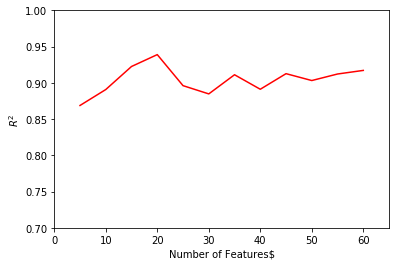

In [65]:
pdf = PdfPages('Folder/separate.pdf')
num=np.array(range(5,65,5))

plt.figure()
plt.plot(num,max_f,color="r")
plt.xlim(0, 65)
plt.ylim(0.7, 1)

plt.xlabel('Number of Features$')
plt.ylabel('$R^2$')
plt.plot()
pdf.savefig()

pdf.close()

max_f 20個, min_f 45個, ave_f 20個

# 検証データでやってみよう

# まずは訓練データと検証データを標準化

In [11]:
train_data=np.loadtxt("FURUKAWA_残基毎_rank.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:20]
train_label=train_data[:,-1]

test_data=np.loadtxt("WANG残基毎_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:20]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

# 次にパラメータチューニング

In [25]:
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]

In [67]:
grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)
print(grid.best_params_)

KeyboardInterrupt: 

# 求めたパラメータを使って予測

In [12]:
reg=SVR(C=2,kernel="rbf",gamma=0.03125)
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)

In [13]:
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

パラメータ: rbf, C 2, gamma 0.03125
SVR: r2 -0.481567, RMSE 1.087833, r 0.840531


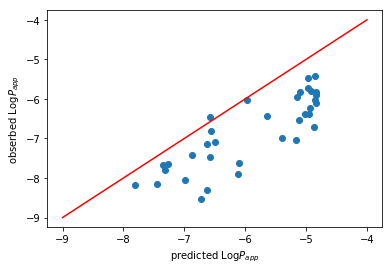

In [14]:
pdf = PdfPages('Folder/残基毎.pdf')

plt.figure()
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="r")      


y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()


pdf.savefig()

pdf.close()



print("パラメータ: rbf, C 2, gamma 0.03125")
print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

In [19]:
len(pred)

36

In [9]:
test_label

array([-5.79, -7.05, -6.11, -6.12, -5.89, -6.02, -5.82, -5.88, -6.24,
       -5.42, -5.95, -5.73, -5.82, -6.54, -5.48, -6.72, -6.39, -7.1 ,
       -8.3 , -7.62, -6.46, -6.81, -7.15, -6.03, -7.47, -7.  , -6.39,
       -6.43, -7.89, -8.52, -7.43, -8.05, -7.64, -8.17, -7.8 , -7.68,
       -8.15])

In [10]:
file=open("考察資料＿残基毎.csv","w")
for i in range(37):
    file.write(str(i+1))
    file.write(",")
    file.write(str(pred[i]))
    file.write(",")
    file.write(str(test_label[i]))
    file.write("\n")
file.close()

# 結果
特徴量 20個の時、

kernel: rbf, C: 2.000000, gamma: 0.031250

r: 0.843036, r2: -0.514317, RMSE: 1.093377

# 次

In [15]:
train_data=np.loadtxt("FURUKAWA_残基毎_rank.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:45]
train_label=train_data[:,-1]

test_data=np.loadtxt("WANG残基毎_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:45]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

In [47]:
grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)
print(grid.best_params_)

{'C': 8, 'gamma': 0.0078125, 'kernel': 'rbf'}


In [16]:
reg=SVR(C=8,kernel="rbf",gamma=0.0078125)
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)

In [17]:
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

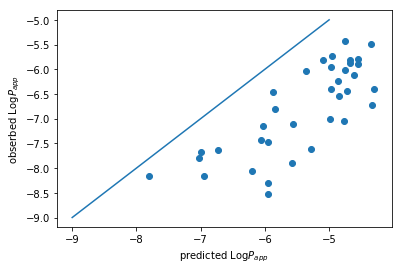

パラメータ: rbf, C 8, gamma 0.0078125
SVR: r2 -1.855333, RMSE 1.510184, r 0.779174


In [18]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.show()
print("パラメータ: rbf, C 8, gamma 0.0078125")
print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

パラメータ: rbf, C 8.000000, gamma 0.007812
SVR: r2 -1.888051, RMSE 1.509954, r 0.783032

# ちょこっとまずい

In [56]:
def predict(x):
    train_data=np.loadtxt("FURUKAWA_残基毎_rank.csv",delimiter=",",dtype=float)
    train_feature=train_data[:,0:x]
    train_label=train_data[:,-1]

    test_data=np.loadtxt("WANG_残基毎_rank.csv",delimiter=",",dtype=float)
    test_feature=test_data[:,0:x]
    test_label=test_data[:,-1]

    std = StandardScaler()
    std.fit(train_feature)
    train_feature = std.transform(train_feature)
    test_feature = std.transform(test_feature)

    grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
    grid.fit(train_feature,train_label)

    reg=SVR(C=grid.best_params_["C"],kernel="rbf",gamma=grid.best_params_["gamma"])
    reg.fit(train_feature,train_label)
    pred = reg.predict(test_feature)

    r = r_calc(test_label,pred)
    r2 = r2_score(test_label,pred)
    rmse = (mean_squared_error(test_label,pred))**0.5

    x = np.linspace(-9,-5)  
    y = x              
    plt.plot(x,y)      

    y1 = pred
    y2 = test_label
    plt.scatter(y1,y2)

    plt.ylabel('obserbed Log$P_{app}$')
    plt.xlabel('predicted Log$P_{app}$')
    plt.show()
    print("パラメータ: rbf, C %f, gamma %f" % (grid.best_params_['C'],grid.best_params_['gamma']))
    print ("SVR: r %f, r2 %f, RMSE %f" % (r, r2, rmse))
    return

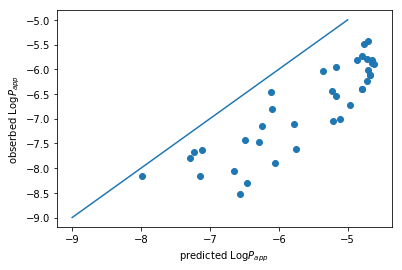

パラメータ: rbf, C 8.000000, gamma 0.007812
SVR: r 0.867573, r2 -1.035779, RMSE 1.267730


In [57]:
predict(64)